In [ ]:
#import sys
#!{sys.executable} -m pip install pandas

#import sys
#!{sys.executable} -m pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 19.6 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [8]:
import csv
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt  
from ipywidgets import interact, FloatSlider
from datetime import datetime

import os

import numpy as np
from numpy.linalg import solve

import pandas as pd
from scipy.interpolate import BSpline

import seaborn as sns

from scipy.linalg import lstsq

from statsmodels.tsa.seasonal import STL


# Traitement de la série temporelle 


In [3]:
# Préparation des dataframes des séries temporelles
Data_file = "data/Data/S1A_ASC-DSC_VV-VH_Paracou"

df_VH_ASC_TropiScat = pd.read_csv(f"{Data_file}/s1a_vh_ASC_047_TropiScat.csv")
df_VH_DSC_TropiScat =  pd.read_csv(f"{Data_file}/s1a_vh_DSC_039_TropiScat.csv")
df_VV_ASC_TropiScat =  pd.read_csv(f"{Data_file}/s1a_vv_ASC_047_TropiScat.csv")
df_VV_DSC_TropiScat =  pd.read_csv(f"{Data_file}/s1a_vv_DSC_039_TropiScat.csv")

dfs_TropiScat = {
    "VV_ASC": df_VV_ASC_TropiScat,
    "VH_ASC": df_VH_ASC_TropiScat,
    "VV_DSC": df_VV_DSC_TropiScat,
    "VH_DSC": df_VH_DSC_TropiScat,
}
df_VH_ASC_allROI =  pd.read_csv(f"{Data_file}/s1a_vh_ASC_047_allROI.csv")
df_VH_DSC_allROI =  pd.read_csv(f"{Data_file}/s1a_vh_DSC_039_allROI.csv")
df_VV_ASC_allROI =  pd.read_csv(f"{Data_file}/s1a_vv_ASC_047_allROI.csv")
df_VV_DSC_allROI =  pd.read_csv(f"{Data_file}/s1a_vv_DSC_039_allROI.csv")

dfs_allROI = {
    "VV_ASC": df_VV_ASC_allROI,
    "VH_ASC": df_VH_ASC_allROI,
    "VV_DSC": df_VV_DSC_allROI,
    "VH_DSC": df_VH_DSC_allROI,
}


value_TropiScat= {
    "VV_ASC": df_VV_ASC_TropiScat.select_dtypes(include='number').to_numpy(),
    "VH_ASC": df_VH_ASC_TropiScat.select_dtypes(include='number').to_numpy(),
    "VV_DSC": df_VV_DSC_TropiScat.select_dtypes(include='number').to_numpy(),
    "VH_DSC": df_VH_DSC_TropiScat.select_dtypes(include='number').to_numpy(),
}

value_allROI = {
    "VV_ASC": df_VV_ASC_allROI.select_dtypes(include='number').to_numpy(),
    "VH_ASC": df_VH_ASC_allROI.select_dtypes(include='number').to_numpy(),
    "VV_DSC": df_VV_DSC_allROI.select_dtypes(include='number').to_numpy(),
    "VH_DSC": df_VH_DSC_allROI.select_dtypes(include='number').to_numpy(),
}

date_TropiScat= {
    "VV_ASC": np.array(df_VV_ASC_TropiScat)[:,0],
    "VH_ASC": np.array(df_VH_ASC_TropiScat)[:,0],
    "VV_DSC": np.array(df_VV_DSC_TropiScat)[:,0],
    "VH_DSC": np.array(df_VH_DSC_TropiScat)[:,0],
}
date_allROI= {
    "VV_ASC": np.array(df_VV_ASC_allROI)[:,0],
    "VH_ASC": np.array(df_VH_ASC_allROI)[:,0],
    "VV_DSC": np.array(df_VV_DSC_allROI)[:,0],
    "VH_DSC": np.array(df_VH_DSC_allROI)[:,0],
}

# STL Implémentation

Série     : VV_ASC | ROI 0
Période   : 30 acquisitions (~1 an)
Variance expliquée par la tendance   : 4.6%
Variance expliquée par la saisonnalité : 38.0%
Variance résiduelle                  : 53.0%


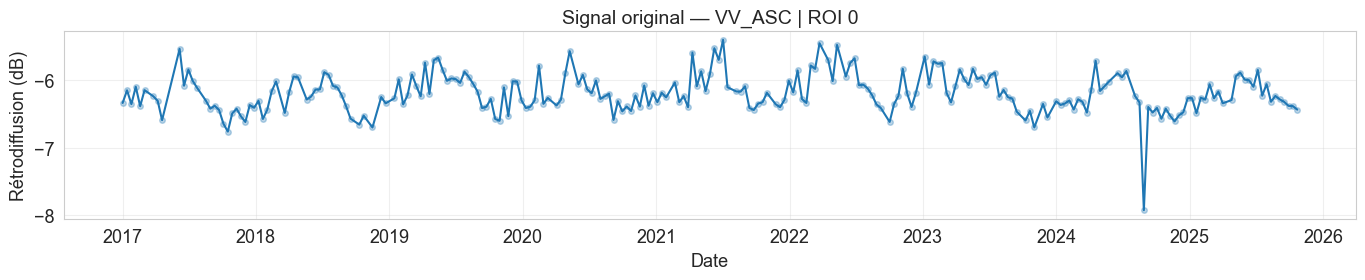

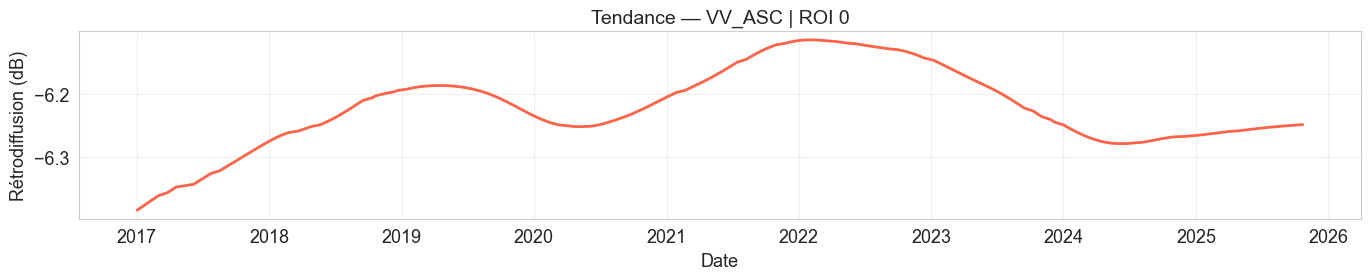

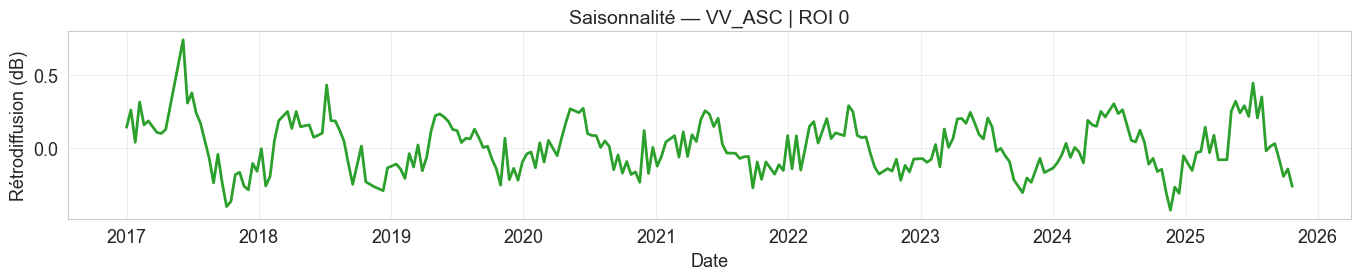

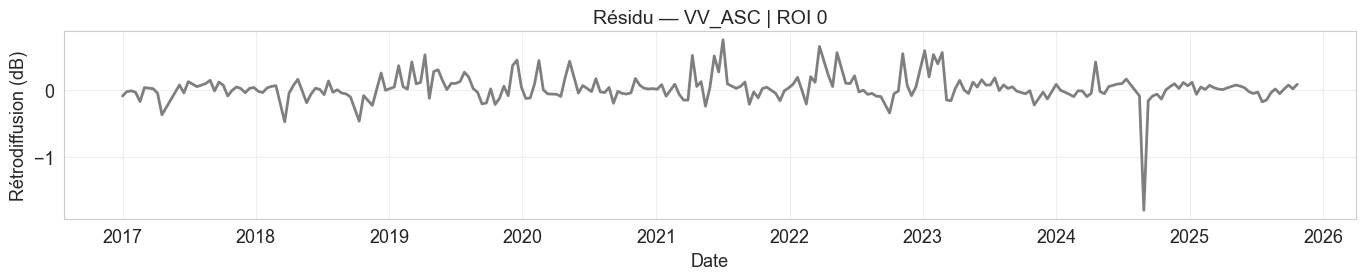

In [9]:
from statsmodels.tsa.seasonal import STL

# ════════════════════════════════════════════════════════════
#  PARAMÈTRES — à modifier ici uniquement
# ════════════════════════════════════════════════════════════

series_to_plot = "VV_ASC"        # "VV_ASC" | "VH_ASC" | "VV_DSC" | "VH_DSC"
roi_index      = 0                # index de la ROI
value_source   = value_allROI     # value_allROI ou value_TropiScat
date_source    = date_allROI      # date_allROI  ou date_TropiScat

# Période saisonnière : 365 / 12 jours ≈ 30 acquisitions par an
period = 30

# ════════════════════════════════════════════════════════════
#  PRÉPARATION DES DONNÉES
# ════════════════════════════════════════════════════════════

dates = pd.to_datetime(date_source[series_to_plot])
values_array = value_source[series_to_plot]
if values_array.ndim == 1:
    values_array = values_array[:, np.newaxis]
roi_idx = min(roi_index, values_array.shape[1] - 1)
values = values_array[:, roi_idx]

# Série temporelle indexée par les dates
ts = pd.Series(values, index=dates)

# ════════════════════════════════════════════════════════════
#  DÉCOMPOSITION STL
# ════════════════════════════════════════════════════════════

stl = STL(ts, period=period, robust=True)
result = stl.fit()

trend    = result.trend
seasonal = result.seasonal
residual = result.resid

print(f"Série     : {series_to_plot} | ROI {roi_idx}")
print(f"Période   : {period} acquisitions (~1 an)")
print(f"Variance expliquée par la tendance   : {trend.var() / ts.var() * 100:.1f}%")
print(f"Variance expliquée par la saisonnalité : {seasonal.var() / ts.var() * 100:.1f}%")
print(f"Variance résiduelle                  : {residual.var() / ts.var() * 100:.1f}%")

# ════════════════════════════════════════════════════════════
#  VISUALISATION
# ════════════════════════════════════════════════════════════

sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 13, "axes.titlesize": 14, "legend.fontsize": 12})

components = {
    "Signal original"  : ts,
    "Tendance"         : trend,
    "Saisonnalité"     : seasonal,
    "Résidu"           : residual,
}
colors = ["tab:blue", "tomato", "tab:green", "tab:gray"]

for (label, component), color in zip(components.items(), colors):
    plt.figure(figsize=(14, 3))
    plt.plot(dates, component, color=color, linewidth=2 if label != "Signal original" else 1.5)
    if label == "Signal original":
        plt.plot(dates, component, 'o', color=color, alpha=0.3, markersize=4)
    plt.title(f"{label} — {series_to_plot} | ROI {roi_idx}")
    plt.xlabel("Date")
    plt.ylabel("Rétrodiffusion (dB)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()